In [1]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.pipeline import Pipeline
import csv
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
df = pd.read_csv('projeto4_telecom_treino.csv')

In [3]:
df.head(10)

,Unnamed: 0,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,1,KS,128,area_code_415,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,no
1,2,OH,107,area_code_415,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
2,3,NJ,137,area_code_415,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
3,4,OH,84,area_code_408,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
4,5,OK,75,area_code_415,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no
5,6,AL,118,area_code_510,yes,no,0,223.4,98,37.98,...,101,18.75,203.9,118,9.18,6.3,6,1.70,0,no
6,7,MA,121,area_code_510,no,yes,24,218.2,88,37.09,...,108,29.62,212.6,118,9.57,7.5,7,2.03,3,no
7,8,MO,147,area_code_415,yes,no,0,157.0,79,26.69,...,94,8.76,211.8,96,9.53,7.1,6,1.92,0,no
8,9,LA,117,area_code_408,no,no,0,184.5,97,31.37,...,80,29.89,215.8,90,9.71,8.7,4,2.35,1,no
9,10,WV,141,area_code_415,yes,yes,37,258.6,84,43.96,...,111,18.87,326.4,97,14.69,11.2,5,3.02,0,no


In [4]:
df.shape

(3333, 21)

In [5]:
df.dtypes

Unnamed: 0                         int64
state                             object
account_length                     int64
area_code                         object
international_plan                object
voice_mail_plan                   object
number_vmail_messages              int64
total_day_minutes                float64
total_day_calls                    int64
total_day_charge                 float64
total_eve_minutes                float64
total_eve_calls                    int64
total_eve_charge                 float64
total_night_minutes              float64
total_night_calls                  int64
total_night_charge               float64
total_intl_minutes               float64
total_intl_calls                   int64
total_intl_charge                float64
number_customer_service_calls      int64
churn                             object
dtype: object

In [6]:
df.groupby('churn').size()

churn
no     2850
yes     483
dtype: int64

In [7]:
df.groupby(['area_code','international_plan']).size()

area_code      international_plan
area_code_408  no                     767
               yes                     71
area_code_415  no                    1505
               yes                    150
area_code_510  no                     738
               yes                    102
dtype: int64

In [8]:
df.isnull().sum()

Unnamed: 0                       0
state                            0
account_length                   0
area_code                        0
international_plan               0
voice_mail_plan                  0
number_vmail_messages            0
total_day_minutes                0
total_day_calls                  0
total_day_charge                 0
total_eve_minutes                0
total_eve_calls                  0
total_eve_charge                 0
total_night_minutes              0
total_night_calls                0
total_night_charge               0
total_intl_minutes               0
total_intl_calls                 0
total_intl_charge                0
number_customer_service_calls    0
churn                            0
dtype: int64

In [9]:
def transformStringToNumber(row):
    if row == "yes":
        return 1
    else:
        return 0

In [10]:
states = np.unique(df['state'].values)
pd.Series(states).to_csv('state.csv')

def tranformStates(row):
    index = np.where(states == row)
    return index[0][0]

In [11]:
df['state'] = df['state'].map(tranformStates)
df['international_plan'] = df['international_plan'].map(transformStringToNumber)
df['voice_mail_plan'] = df['voice_mail_plan'].map(transformStringToNumber)
df['area_code']  = df['area_code'].map(lambda x: int(x[-3:]))
df['churn'] = df['churn'].map(transformStringToNumber)
del(df['Unnamed: 0'])

In [12]:
df.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,16,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,35,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,31,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,35,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,36,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


In [13]:
df.dtypes

state                              int64
account_length                     int64
area_code                          int64
international_plan                 int64
voice_mail_plan                    int64
number_vmail_messages              int64
total_day_minutes                float64
total_day_calls                    int64
total_day_charge                 float64
total_eve_minutes                float64
total_eve_calls                    int64
total_eve_charge                 float64
total_night_minutes              float64
total_night_calls                  int64
total_night_charge               float64
total_intl_minutes               float64
total_intl_calls                   int64
total_intl_charge                float64
number_customer_service_calls      int64
churn                              int64
dtype: object

In [14]:
df.describe()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,26.059406,101.064806,437.182418,0.096910,0.276628,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856,0.144914
std,14.824911,39.822106,42.371290,0.295879,0.447398,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491,0.352067
min,0.000000,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,14.000000,74.000000,408.000000,0.000000,0.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000,0.000000
50%,26.000000,101.000000,415.000000,0.000000,0.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000,0.000000
75%,39.000000,127.000000,510.000000,0.000000,1.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000,0.000000
max,50.000000,243.000000,510.000000,1.000000,1.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000,1.000000


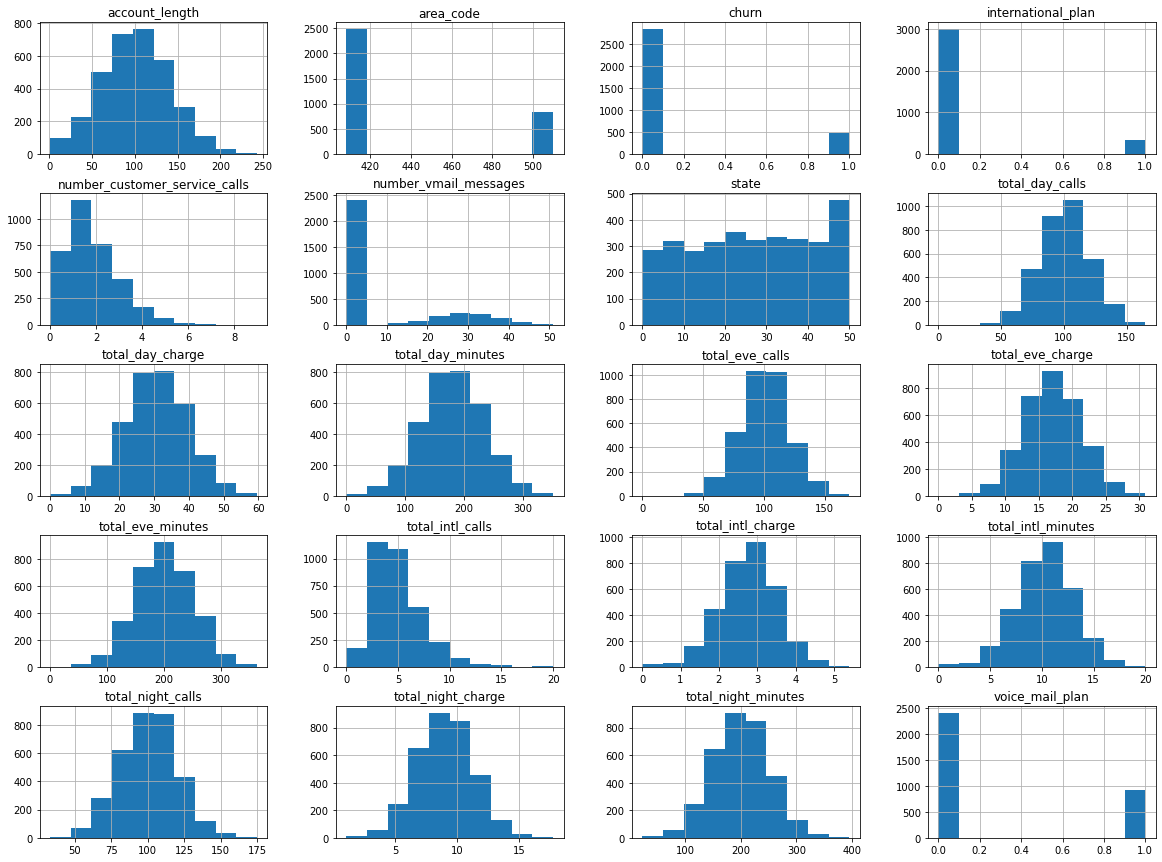

In [15]:
df.hist(figsize=(20,15))
plt.show()

In [16]:
df.corr(method = 'pearson')

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
state,1.000000,0.003678,0.015814,-0.004597,-0.031664,-0.027762,-0.006737,-0.000764,-0.006736,0.013682,-0.016268,0.013674,0.024576,0.007458,0.024572,-0.007834,0.013967,-0.007819,-0.025861,0.007780
account_length,0.003678,1.000000,-0.012463,0.024735,0.002918,-0.004628,0.006216,0.038470,0.006214,-0.006757,0.019260,-0.006745,-0.008955,-0.013176,-0.008960,0.009514,0.020661,0.009546,-0.003796,0.016541
area_code,0.015814,-0.012463,1.000000,0.048551,-0.000747,-0.001994,-0.008264,-0.009646,-0.008264,0.003580,-0.011886,0.003607,-0.005825,0.016522,-0.005845,-0.018288,-0.024179,-0.018395,0.027572,0.006174
international_plan,-0.004597,0.024735,0.048551,1.000000,0.006006,0.008745,0.049396,0.003755,0.049398,0.019100,0.006114,0.019106,-0.028905,0.012451,-0.028913,0.045871,0.017366,0.045780,-0.024522,0.259852
voice_mail_plan,-0.031664,0.002918,-0.000747,0.006006,1.000000,0.956927,-0.001684,-0.011086,-0.001686,0.021545,-0.006444,0.021559,0.006079,0.015553,0.006064,-0.001318,0.007618,-0.001276,-0.017824,-0.102148
number_vmail_messages,-0.027762,-0.004628,-0.001994,0.008745,0.956927,1.000000,0.000778,-0.009548,0.000776,0.017562,-0.005864,0.017578,0.007681,0.007123,0.007663,0.002856,0.013957,0.002884,-0.013263,-0.089728
total_day_minutes,-0.006737,0.006216,-0.008264,0.049396,-0.001684,0.000778,1.000000,0.006750,1.000000,0.007043,0.015769,0.007029,0.004323,0.022972,0.004300,-0.010155,0.008033,-0.010092,-0.013423,0.205151
total_day_calls,-0.000764,0.038470,-0.009646,0.003755,-0.011086,-0.009548,0.006750,1.000000,0.006753,-0.021451,0.006462,-0.021449,0.022938,-0.019557,0.022927,0.021565,0.004574,0.021666,-0.018942,0.018459
total_day_charge,-0.006736,0.006214,-0.008264,0.049398,-0.001686,0.000776,1.000000,0.006753,1.000000,0.007050,0.015769,0.007036,0.004324,0.022972,0.004301,-0.010157,0.008032,-0.010094,-0.013427,0.205151
total_eve_minutes,0.013682,-0.006757,0.003580,0.019100,0.021545,0.017562,0.007043,-0.021451,0.007050,1.000000,-0.011430,1.000000,-0.012584,0.007586,-0.012593,-0.011035,0.002541,-0.011067,-0.012985,0.092796


In [17]:
correlations = df.corr(method = 'pearson')
correlations.iloc[19]

state                            0.007780
account_length                   0.016541
area_code                        0.006174
international_plan               0.259852
voice_mail_plan                 -0.102148
number_vmail_messages           -0.089728
total_day_minutes                0.205151
total_day_calls                  0.018459
total_day_charge                 0.205151
total_eve_minutes                0.092796
total_eve_calls                  0.009233
total_eve_charge                 0.092786
total_night_minutes              0.035493
total_night_calls                0.006141
total_night_charge               0.035496
total_intl_minutes               0.068239
total_intl_calls                -0.052844
total_intl_charge                0.068259
number_customer_service_calls    0.208750
churn                            1.000000
Name: churn, dtype: float64

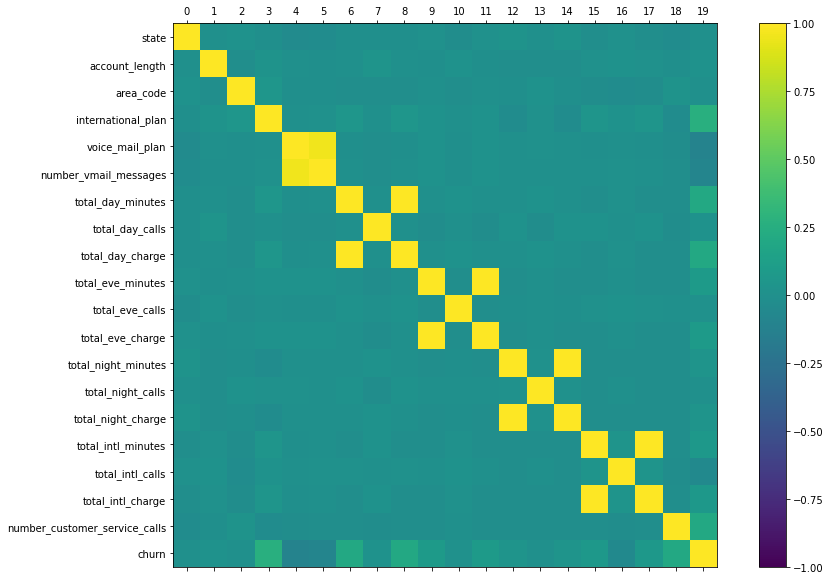

In [18]:
colunas = df.columns
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin = -1, vmax = 1)
fig.colorbar(cax)
ticks = np.arange(0, df.shape[1], 1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(ticks)
ax.set_yticklabels(colunas)
plt.show()

In [19]:
X = df.iloc[:,0:19].values
Y = df.iloc[:,:20:20].values

In [20]:
from sklearn.ensemble import ExtraTreesClassifier
# Criação do Modelo - Feature Selection
modelo = ExtraTreesClassifier()
modelo.fit(X, Y)

series = pd.DataFrame(pd.Series(df.columns[0:19]), columns=['var'])
series['score'] = modelo.feature_importances_
series = series.sort_values(by = 'score')
series

,var,score
3,international_plan,0.006663
4,voice_mail_plan,0.013239
5,number_vmail_messages,0.020033
2,area_code,0.028037
18,number_customer_service_calls,0.036312
16,total_intl_calls,0.041430
17,total_intl_charge,0.041691
14,total_night_charge,0.042082
15,total_intl_minutes,0.042416
8,total_day_charge,0.042628


In [21]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

rfe = RFE(modelo, 10)
fit = rfe.fit(X, Y)

series = pd.DataFrame(pd.Series(df.columns[0:19]), columns=['var'])
series['select'] =  fit.support_
series['rank'] = fit.ranking_
series = series.sort_values(by = 'rank')
series

,var,select,rank
0,state,True,1
1,account_length,True,1
15,total_intl_minutes,True,1
13,total_night_calls,True,1
12,total_night_minutes,True,1
11,total_eve_charge,True,1
6,total_day_minutes,True,1
7,total_day_calls,True,1
8,total_day_charge,True,1
10,total_eve_calls,True,1


In [22]:
var_selecionadas = ['state','total_intl_calls','total_intl_minutes','total_night_calls','total_eve_calls','total_day_calls',\
                    'total_eve_minutes','total_eve_minutes','number_vmail_messages','area_code','number_customer_service_calls',\
                    'churn']

df_treino = df[var_selecionadas]
df_treino.head(5)

,state,total_intl_calls,total_intl_minutes,total_night_calls,total_eve_calls,total_day_calls,total_eve_minutes,total_eve_minutes,number_vmail_messages,area_code,number_customer_service_calls,churn
0,16,3,10.0,91,99,110,197.4,197.4,25,415,1,0
1,35,3,13.7,103,103,123,195.5,195.5,26,415,1,0
2,31,5,12.2,104,110,114,121.2,121.2,0,415,0,0
3,35,7,6.6,89,88,71,61.9,61.9,0,408,2,0
4,36,3,10.1,121,122,113,148.3,148.3,0,415,3,0


In [23]:
df_teste = pd.read_csv('projeto4_telecom_teste.csv')
df_teste['state'] = df_teste['state'].map(tranformStates)
df_teste['international_plan'] = df_teste['international_plan'].map(transformStringToNumber)
df_teste['voice_mail_plan'] = df_teste['voice_mail_plan'].map(transformStringToNumber)
df_teste['area_code']  = df_teste['area_code'].map(lambda x: int(x[-3:]))
df_teste['churn'] = df_teste['churn'].map(transformStringToNumber)
del(df_teste['Unnamed: 0'])
df_teste = df_teste[var_selecionadas]
df_teste.head(5)

,state,total_intl_calls,total_intl_minutes,total_night_calls,total_eve_calls,total_day_calls,total_eve_minutes,total_eve_minutes,number_vmail_messages,area_code,number_customer_service_calls,churn
0,11,3,10.6,73,73,123,211.9,211.9,0,510,3,0
1,26,7,9.5,81,139,86,244.8,244.8,0,510,0,0
2,35,6,13.7,127,105,95,237.3,237.3,29,408,1,0
3,32,2,15.7,82,88,123,126.4,126.4,0,415,1,0
4,40,4,7.7,107,101,78,124.0,124.0,0,415,2,0


In [24]:
index = df_treino.shape[1] - 1
X_treino = df_treino.iloc[:,0:index].values
Y_treino = df_treino.iloc[:,index].values
X_teste = df_teste.iloc[:,0:index].values
Y_teste = df_teste.iloc[:,index].values

## Modelo 1

In [25]:
# Criação do modelo
modelo = LogisticRegression()

# Treinamento do modelo
modelo.fit(X_treino, Y_treino)

# Score do modelo nos dados de teste
result_treino = modelo.score(X_treino, Y_treino)
result_teste = modelo.score(X_teste, Y_teste)
previsoes = modelo.predict(X_teste)
matrix = confusion_matrix(Y_teste, previsoes)

print("Acurácia nos Dados de treino: %.3f%%" % (result_treino * 100.0))
print("Acurácia nos Dados de Teste: %.3f%%" % (result_teste * 100.0))
print(matrix)

Acurácia nos Dados de treino: 85.839%
Acurácia nos Dados de Teste: 86.743%
[[1437    6]
 [ 215    9]]


## Modelo 2

In [26]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range = (0, 1))
scaler.fit(X_treino)
X_treino2 = scaler.transform(X_treino)
X_teste2 = scaler.transform(X_teste)

In [27]:
modelo2 = LogisticRegression()

# Treinamento do modelo
modelo2.fit(X_treino2, Y_treino)

# Score do modelo nos dados de teste
result_treino = modelo2.score(X_treino2, Y_treino)
result_teste = modelo2.score(X_teste2, Y_teste)
previsoes = modelo2.predict(X_teste2)
matrix = confusion_matrix(Y_teste, previsoes)

print("Acurácia nos Dados de treino: %.3f%%" % (result_treino * 100.0))
print("Acurácia nos Dados de Teste: %.3f%%" % (result_teste * 100.0))
print(matrix)

Acurácia nos Dados de treino: 85.809%
Acurácia nos Dados de Teste: 86.383%
[[1437    6]
 [ 221    3]]


## Modelo 3

In [28]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X_treino)
X_treino3 = scaler.transform(X_treino)
X_teste3 = scaler.transform(X_teste)

In [29]:
modelo3 = LogisticRegression()

# Treinamento do modelo
modelo3.fit(X_treino3, Y_treino)

# Score do modelo nos dados de teste
result = modelo3.score(X_teste3, Y_teste)
previsoes = modelo3.predict(X_teste3)
matrix = confusion_matrix(Y_teste, previsoes)

print("Acurácia nos Dados de Teste: %.3f%%" % (result * 100.0))
print(matrix)

Acurácia nos Dados de Teste: 86.503%
[[1435    8]
 [ 217    7]]


In [30]:
df_teste['predict'] = previsoes

In [31]:
df_teste.head(5)

,state,total_intl_calls,total_intl_minutes,total_night_calls,total_eve_calls,total_day_calls,total_eve_minutes,total_eve_minutes,number_vmail_messages,area_code,number_customer_service_calls,churn,predict
0,11,3,10.6,73,73,123,211.9,211.9,0,510,3,0,0
1,26,7,9.5,81,139,86,244.8,244.8,0,510,0,0,0
2,35,6,13.7,127,105,95,237.3,237.3,29,408,1,0,0
3,32,2,15.7,82,88,123,126.4,126.4,0,415,1,0,0
4,40,4,7.7,107,101,78,124.0,124.0,0,415,2,0,0


## Hyper Parametro

In [32]:
from sklearn.model_selection import GridSearchCV

valores_grid = {'penalty': ['l1','l2'], 'C': [0.001,0.01,0.1,1,10,100,1000]}
grid = GridSearchCV(estimator = modelo, param_grid = valores_grid)
grid.fit(X_treino3, Y_treino)

result = grid.score(X_teste3, Y_teste)
previsoes = grid.predict(X_teste3)
matrix = confusion_matrix(Y_teste, previsoes)

print("Acurácia nos Dados de Teste: %.3f%%" % (result * 100.0))
print(matrix)

Acurácia nos Dados de Teste: 86.503%
[[1435    8]
 [ 217    7]]


## Salvando Modelo

In [33]:
import pickle

pipe = Pipeline([('Padronização',scaler),('HyperParametros-Logistc',grid)])
pipe.fit(X_treino, Y_treino)
result = pipe.score(X_teste3, Y_teste)
pickle.dump(pipe, open('modelo_treinado', 'wb'))
print("Acurácia nos Dados de Teste: %.3f%%" % (result * 100.0))

Acurácia nos Dados de Teste: 86.563%
